---
title: "ARM and Networking"
pdf-engine: lualatex
format:
  html:
    code-fold: true
    code-summary: "Code"
    toc-title: Contents
execute:
    warning: false
---

## Introduction
#### Dataset Introduction
This dataset contains text I collected from twitter api. The text mainly talks about the users' reviews about consumers privacy by using media. 
Since I have preprocessed the text and remove stopwords, I need to just tokenize the data for preprocessing. 

#### Method Introduction
In data mining and machine learning, Association Rules is a relatively commonly used unsupervised learning algorithm. Different from the classification and clustering algorithms we have learned before, the main purpose of this type of algorithm is to ——Explore the correlation between the inherent structural features (ie variables) of the data.

To put it simply, it is to find some meaningful and valuable relationships in large-scale data sets. With these relationships, on the one hand, it can help us broaden our understanding of data and its characteristics; on the other hand, it can realize the construction and application of recommendation systems (such as shopping basket analysis, etc.).

After we have a basic understanding of association rules, we further subdivide them. Taking the association in daily life as an example, among the customers who visit the supermarket, those who buy bread will largely buy milk. The association of classes is called simple association rules ; for another example, many customers who buy car sun visors will buy zero-degree glass of water in the near future. Such cases not only reflect the association relationship between things, but also have a time sequence , so this type of association is called sequence association rules.

Association rules in a broad sense include simple association and sequence association. Next, we will conduct in-depth study on these two pieces of knowledge respectively.

1. Confidence
Definition: Assume that among the transactions in W that support item set A , c % of the transactions also support item set B, and c % is called the credibility of the association rule A → B.   

Popular explanation: Simply put, credibility refers to the probability that item set B also appears in a transaction T in which item set A appears.   

Example: In the above example of a ballpoint pen and a notebook, the credibility of the association rule answers the question: If a customer buys a ballpoint pen, how likely is it that he also buys a notebook? In the example above, 65 % of customers who bought ballpoint pens bought notebooks, so the confidence level is 65 %. 

Probability description: the confidence of item set A to item set B (A==>B)=P(A|B)

2. Support
Definition: Let s% of transactions in  W  support item sets A  and B at the same time, s  % is called the support degree of association rule A→B  . The support degree describes  how likely the union C of the two item sets  A and B  appears in all transactions.

Popular explanation: Simply put, the support of A==>B refers to the probability that item set A and item set B appear at the same time.

Example: A total of 1,000 customers went to the mall to buy items on a certain day, and 150 of them bought ballpoint pens and notebooks at the same time, so the support of the above association rule is 15%.

Probability description: item set A supports item set B support (A==>B)=P(A n B)

3. Expected confidence
Definition: Let e% of transactions in  W  support item set B, and e  % is called  the expected credibility of association rule A→B.

Popular explanation: the expected credibility describes  the probability of item set B appearing in all transactions without any conditional influence.

Example illustration: If a total of 1000  customers went to the mall to purchase items on a certain day, and 250 of  them purchased ballpoint pens, then the expected reliability of the above association rule is 25%.

Probability description: The expected confidence of item set A to item set B is support(B)=P(B)

4. Lift (lift)
Definition: Lift is the ratio of credibility to expected credibility

Popular explanation: The degree of promotion reflects how much the occurrence probability of item set B has changed from "the appearance of item set A".

Example description: The promotion degree of the above association rules = 65%/25% = 2.6

Probability description: The expected confidence of item set A on item set B is lift (A==>B) = confidence (A==>B)/support(B)=p(B|A)/p(B)

In short, credibility is a measure of the accuracy of association rules, and support is a measure of the importance of association rules. The degree of support shows how representative this rule is in all transactions. Obviously, the greater the degree of support, the more important the association rule is. Although some association rules have high credibility, their support is very low, which means that the association rule has little chance of being practical, so it is not important.






#### Process 
1. Load the required packages and dataset

2. Preprocessed the data. Use nltk.tokenize to split sentences as word by word.

3. Re-format output

4. Convert to NetworkX object

5. Plot NetworkX object

6. Train ARM model

7. Visualize the results

## Method

#### Load the required packages

In [2]:
import nltk
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from apyori import apriori
import networkx as nx 

#### Load the required dataset

In [4]:
df = pd.read_csv('../data/01-modified-data/tweetresult.csv')
df = df['0']
transactions= [word_tokenize(df[i]) for i in range(len(df))]
transactions[0:5]


[['memorable',
  'connection',
  'respect',
  'consumer',
  'privacy',
  'unfold',
  'right',
  'moment',
  'audience',
  'target',
  'contextual',
  'solution'],
 ['memorable',
  'connection',
  'respect',
  'consumer',
  'privacy',
  'unfold',
  'right',
  'moment',
  'audience',
  'target',
  'contextual',
  'solution'],
 ['rt',
  'okeymornumber',
  'jay_scherrer',
  'muskqunumberte',
  'elonmusk',
  'elon',
  'musk',
  'challenge',
  'donald',
  'trump',
  'title',
  'shameless',
  'liar',
  'apple'],
 ['jay_scherrer',
  'muskqunumberte',
  'elonmusk',
  'elon',
  'musk',
  'challenge',
  'donald',
  'trump',
  'title',
  'shameless',
  'liar',
  'apple',
  'search',
  'engine',
  'exert',
  'control',
  'echo',
  'system',
  'protect',
  'consumer',
  'privacy',
  'security'],
 ['danknightmma',
  'dear',
  'dan',
  'like',
  'engage',
  'canadian',
  'read',
  'bill',
  'explain',
  'modernize',
  'consumer',
  'privacy',
  'law',
  'bad',
  'canadians',
  'thank',
  'billcnumber'

## Function Introduction

After tokenize the text, we can move forward to use several functions to train the ARM model. 

The reformat_results function are used to reformat the tokenized dataframe by using apriori algorithm. And store them into columns "rhs","lhs","supp","conf","supp*conf","lift". 

What is apriori algorithm?

Apriori Algorithm is one of the classic algorithms for association rule learning .

The prior algorithm is designed to work with databases containing transactional information content. For example, a list of products purchased by customers, or a list of frequently visited web pages, etc.

The prior algorithm uses the breadth -first search algorithm to search and uses the tree structure to efficiently count the candidate itemsets. A candidate item set of length k is generated from a candidate item set of length k−1 , and then candidates containing uncommon subpatterns are removed from it. According to the downward closure lemma, the candidate itemset contains all frequent itemsets of length k. After that, the frequent itemsets in the candidate itemsets can be determined by scanning the transaction database.

convert_to_network and plot_network are utilized for the final plots which are the RESULTS AS A NETWORK-X OBJECT 

In [4]:
def reformat_results(results):
    keep=[]
    for i in range(0,len(results)):
        for j in range(0,len(list(results[i]))):
            if(j>1):
                for k in range(0,len(list(results[i][j]))):
                    if(len(results[i][j][k][0])!=0):
                        rhs=list(results[i][j][k][0])
                        lhs=list(results[i][j][k][1])
                        conf=float(results[i][j][k][2])
                        lift=float(results[i][j][k][3])
                        keep.append([rhs,lhs,supp,conf,supp*conf,lift])
            if(j==1):
                supp=results[i][j]
    return pd.DataFrame(keep, columns=["rhs","lhs","supp","conf","supp*conf","lift"])

In [5]:
def convert_to_network(df):
    print(df)

    #BUILD GRAPH
    G = nx.DiGraph()  # DIRECTED
    for row in df.iterrows():
        # for column in df.columns:
        lhs="_".join(row[1][0])
        rhs="_".join(row[1][1])
        conf=row[1][3]; #print(conf)
        if(lhs not in G.nodes): 
            G.add_node(lhs)
        if(rhs not in G.nodes): 
            G.add_node(rhs)

        edge=(lhs,rhs)
        if edge not in G.edges:
            G.add_edge(lhs, rhs, weight=conf)

    # print(G.nodes)
    # print(G.edges)
    return G

In [6]:
def plot_network(G):
    #SPECIFIY X-Y POSITIONS FOR PLOTTING
    pos=nx.random_layout(G)

    #GENERATE PLOT
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 15)

    #assign colors based on attributes
    weights_e 	= [G[u][v]['weight'] for u,v in G.edges()]

    #SAMPLE CMAP FOR COLORS 
    cmap=plt.cm.get_cmap('Blues')
    colors_e 	= [cmap(G[u][v]['weight']*10) for u,v in G.edges()]

    #PLOT
    nx.draw(
    G,
    edgecolors="black",
    edge_color=colors_e,
    node_size=2000,
    linewidths=2,
    font_size=8,
    font_color="white",
    font_weight="bold",
    width=weights_e,
    with_labels=True,
    pos=pos,
    ax=ax
    )
    ax.set(title='Dracula')
    plt.show()

# raise


## Train ARM model 

In [8]:
# INSERT CODE TO TRAIN THE ARM MODEL USING THE "apriori" PACKAGE
print("Transactions:",pd.DataFrame(transactions).head())
results = list(apriori(transactions, min_support=0.05, min_confidence=0.05, min_length=1, min_lift=0, max_length=10))     #RUN APRIORI ALGORITHM
pd_results=reformat_results(results)
print(pd_results.shape)

Transactions:              0               1             2               3         4   \
0     memorable      connection       respect        consumer   privacy   
1     memorable      connection       respect        consumer   privacy   
2            rt   okeymornumber  jay_scherrer  muskqunumberte  elonmusk   
3  jay_scherrer  muskqunumberte      elonmusk            elon      musk   
4  danknightmma            dear           dan            like    engage   

          5       6          7         8          9   ...    25    26    27  \
0     unfold   right     moment  audience     target  ...  None  None  None   
1     unfold   right     moment  audience     target  ...  None  None  None   
2       elon    musk  challenge    donald      trump  ...  None  None  None   
3  challenge  donald      trump     title  shameless  ...  None  None  None   
4   canadian    read       bill   explain  modernize  ...  None  None  None   

     28    29    30    31    32    33    34  
0  None  None 

           rhs         lhs  supp      conf  supp*conf       lift
0        [act]       [amp]  0.06  0.600000   0.036000   6.666667
1        [amp]       [act]  0.06  0.666667   0.040000   6.666667
2        [act]        [co]  0.09  0.900000   0.081000   1.500000
3         [co]       [act]  0.09  0.150000   0.013500   1.500000
4        [act]  [consumer]  0.10  1.000000   0.100000   1.149425
5   [consumer]       [act]  0.10  0.114943   0.011494   1.149425
6        [act]     [https]  0.09  0.900000   0.081000   1.475410
7      [https]       [act]  0.09  0.147541   0.013279   1.475410
8        [act]   [privacy]  0.10  1.000000   0.100000   1.149425
9    [privacy]       [act]  0.10  0.114943   0.011494   1.149425
10       [act]         [t]  0.09  0.900000   0.081000   1.475410
11         [t]       [act]  0.09  0.147541   0.013279   1.475410
12        [ad]  [consumer]  0.05  1.000000   0.050000   1.149425
13  [consumer]        [ad]  0.05  0.057471   0.002874   1.149425
14        [ad]   [privacy

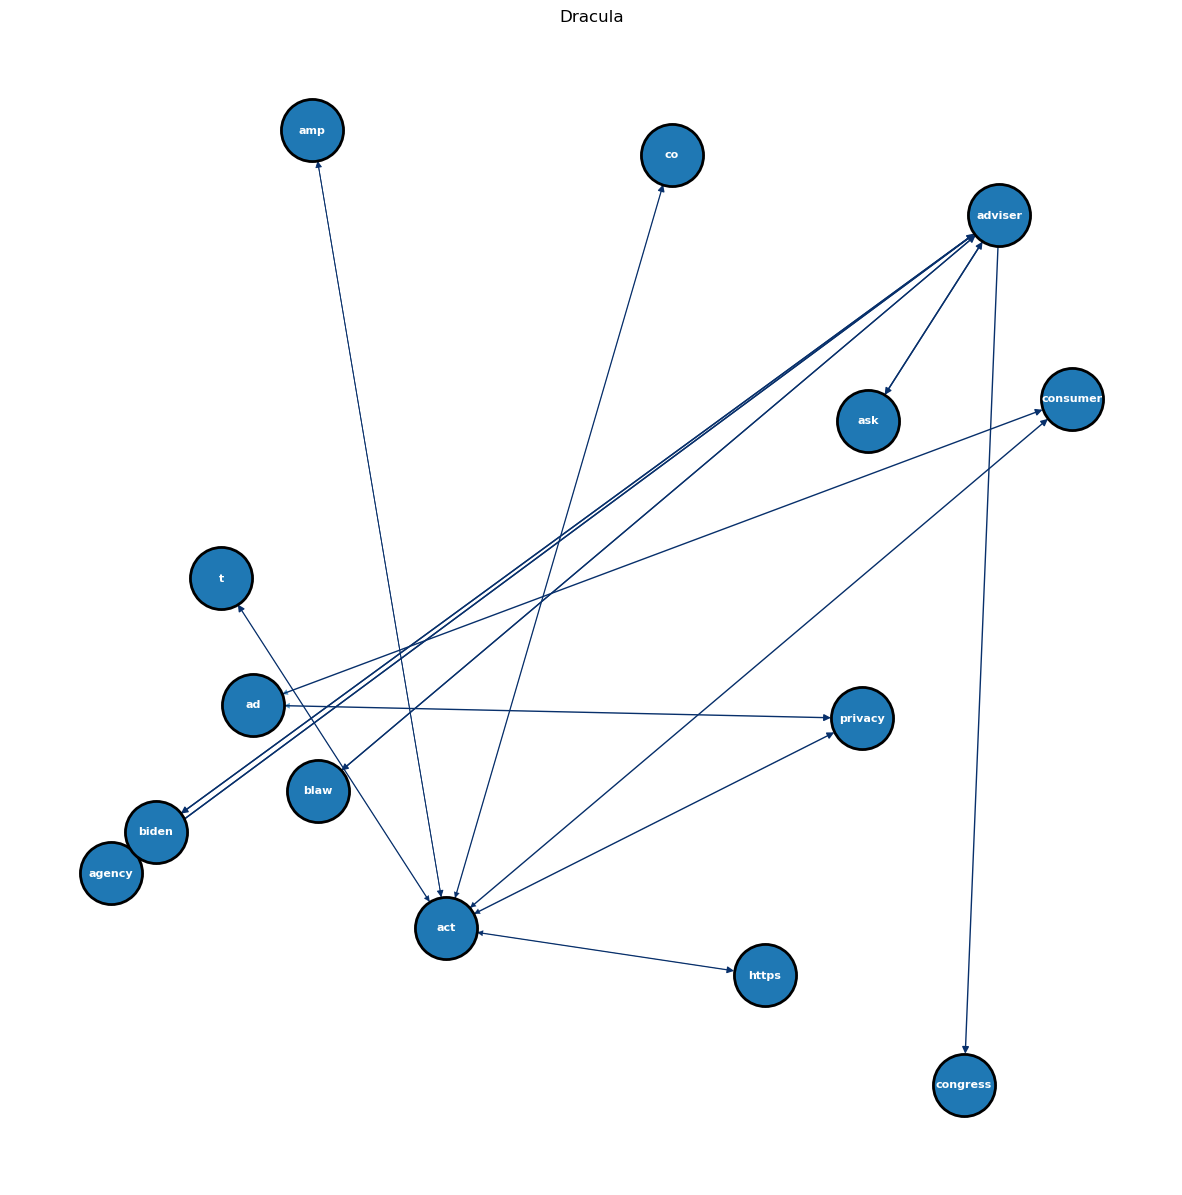

In [9]:
# INSERT CODE TO PLOT THE RESULTS AS A NETWORK-X OBJECT 
G=convert_to_network(pd_results[0:25])
plot_network(G)

As we can see in the plot, it clearly show some main relationships with words to words. 

## Conclusion
Advantages and disadvantages of Apriori algorithm

Advantages:

1) The Aprioi algorithm adopts the iterative method of layer-by-layer search, the algorithm is simple and clear, there is no complicated theoretical derivation, and it is easy to implement.

2) Data is organized horizontally

3) Apriori optimization method is used

4) It is suitable for association rule mining of transactional database.

5) Suitable for sparse data sets: According to previous research, this algorithm can only be suitable for association rule mining of sparse data 

sets, that is, data sets with a slightly smaller length of frequent itemsets.

Defects:

1) Too many scans to the database.

2) The Apion algorithm may generate a large number of candidate itemsets.

3) When the length of frequent itemsets becomes larger, the operation time increases significantly.

4) The unique support degree is adopted, without considering the difference in the importance of each attribute.

5) The adaptability of the algorithm is narrow.


#### Reference
Wikimedia Foundation. (2022, December 2). Association rule learning. Wikipedia. Retrieved December 4, 2022, from https://en.wikipedia.org/wiki/Association_rule_learning 